<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 8</b></center>    
<pre>    

### Namra Pithwa
### 23010101641
### 31/01/2025

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [4]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [5]:
# Display the first few rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Display summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

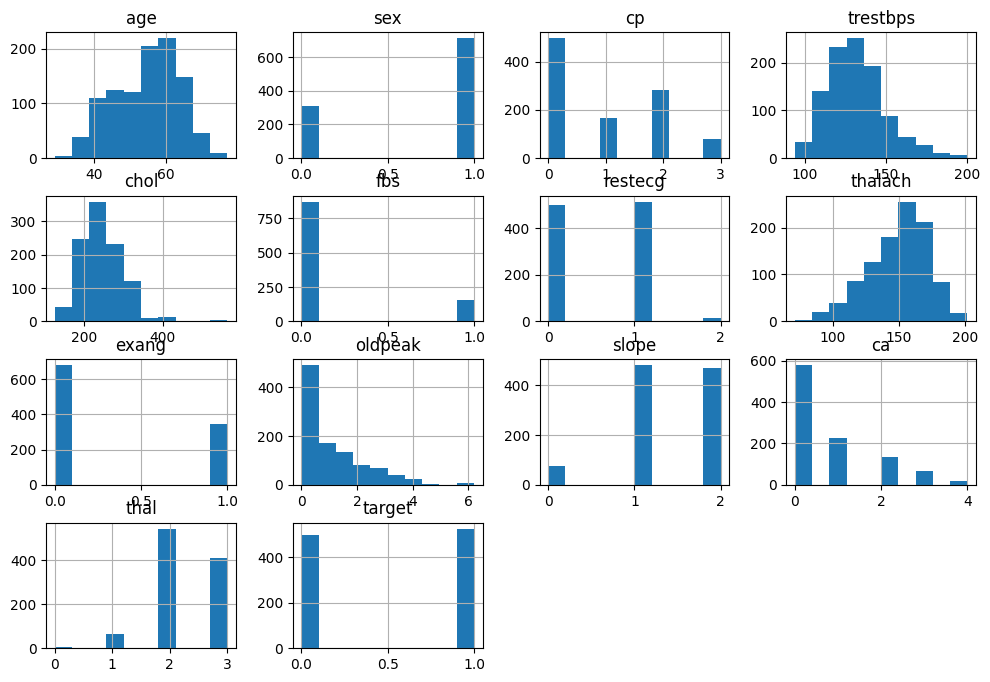

In [9]:
df.hist(figsize=(12, 8))
plt.show()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

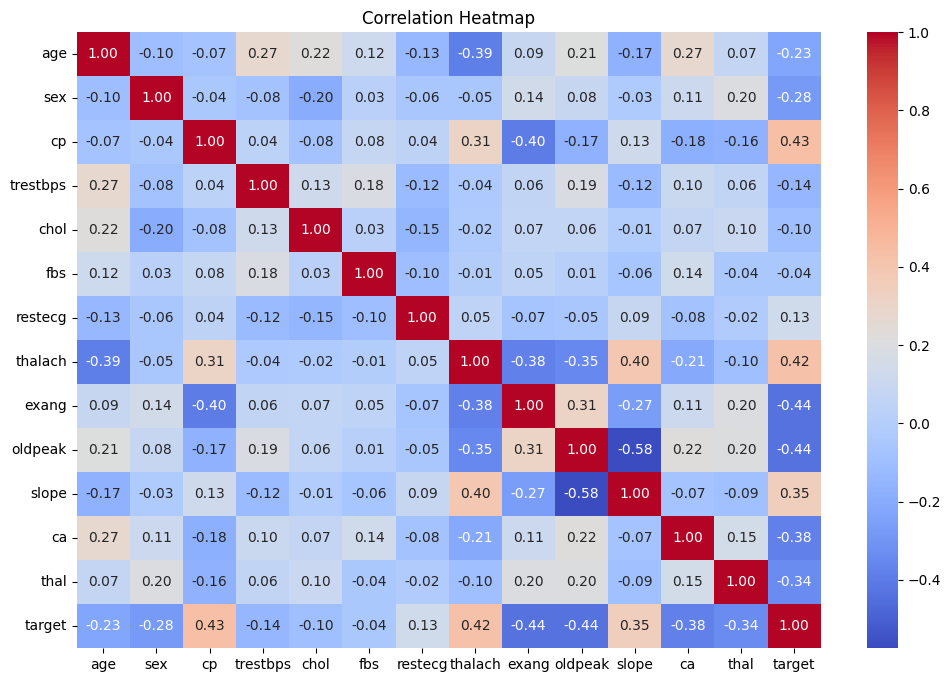

In [13]:
import seaborn as sns
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

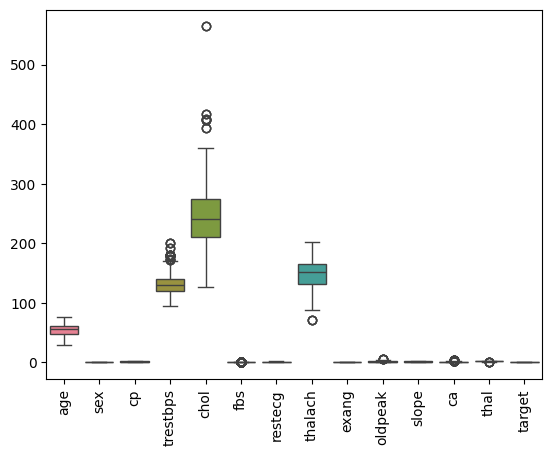

In [14]:
# Plot boxplots for each feature
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [15]:
# Define the features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [26]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [27]:

# Train KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [28]:
# Train GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

# Step 9: Evaluate Decision Tree
We evaluate the Decision Tree model using accuracy, confusion matrix, and classification report.

In [30]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)
print("Decision tree accuracy: ", accuracy_score(y_test, y_pred))
print("Decision tree confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Decision tree classification report: \n", classification_report(y_test, y_pred))

Decision tree accuracy:  0.961038961038961
Decision tree confusion matrix: 
 [[139   6]
 [  6 157]]
Decision tree classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       145
           1       0.96      0.96      0.96       163

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



# Step 10: Visualize Decision Tree
Here we visualize the structure of the trained Decision Tree.

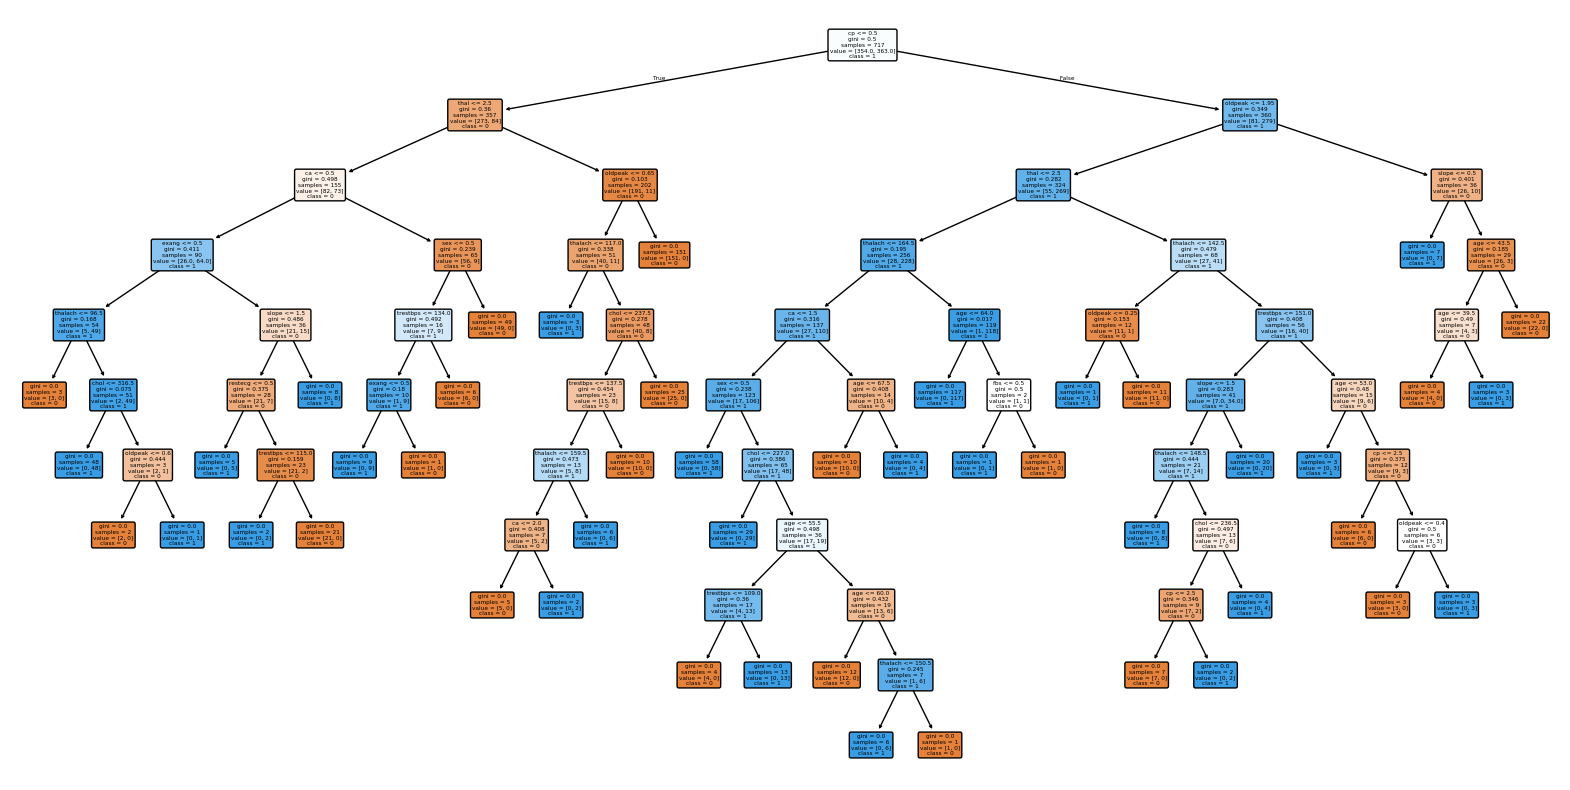

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [34]:
# Train Bagging Classifier with Decision Trees as the base model
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [37]:
y_pred = bagging.predict(X_test)
print("Bagging accuracy: ", accuracy_score(y_test, y_pred))


Bagging accuracy:  0.9805194805194806


In [40]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42,estimator=DecisionTreeClassifier(max_depth=10))
ada.fit(X_train, y_train)

c:\Users\namra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=100, random_state=42)

# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

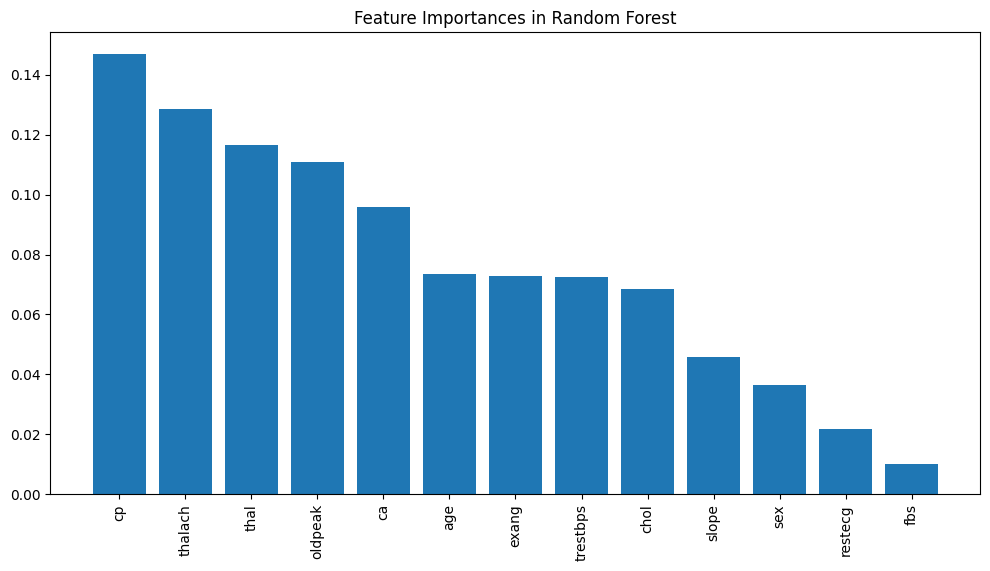

In [43]:
import numpy as np
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importances in Random Forest')
plt.show()

# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

In [44]:
y_pred = rf.predict(X_test)
print("Random Forest accuracy: ", accuracy_score(y_test, y_pred))

Random Forest accuracy:  0.9902597402597403


# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.